<a href="https://colab.research.google.com/github/ElianGonzalez0202/Evaluacion_formativa_2/blob/main/Elian_Gonzalez_regresi%C3%B3n_lineal_taxi_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#@title Copyright 2023 Google LLC. Haga doble clic aquí para obtener información sobre la licencia.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colaboración

El Curso Intensivo de Aprendizaje Automático utiliza Colaboratories (Colabs) para todos los ejercicios de programación. Colab es la implementación de Google de [Jupyter Notebook](https://jupyter.org/). Para más información sobre Colabs y cómo usarlos, visita [Bienvenido a Colaboratory](https://research.google.com/colaboratory).

# Regresión lineal
En este Colab, usarás un conjunto de datos reales para entrenar un modelo que prediga el precio de un taxi en Chicago, Illinois.

## Objetivos de aprendizaje
Después de completar este Colab, podrás:

* Leer un archivo .csv en un DataFrame de [pandas](https://developers.google.com/machine-learning/glossary/#pandas).
* Explorar un conjunto de datos con bibliotecas de visualización de Python.
* Experimentar con diferentes características para crear un modelo de regresión lineal.
* Ajustar los hiperparámetros del modelo. * Compare las ejecuciones de entrenamiento utilizando el [error cuadrático medio](https://developers.google.com/machine-learning/glossary/#root-mean-squared-error-rmse) y las [curvas de pérdida](https://developers.google.com/machine-learning/glossary/#loss-curve).

## Descripción del conjunto de datos
El [conjunto de datos para este ejercicio](https://storage.mtls.cloud.google.com/mlcc-nextgen-internal/chicago_taxi_train.csv) se deriva de la [Conjunto de datos de viajes en taxi de la ciudad de Chicago](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew). Los datos de este ejercicio son un subconjunto de los datos de viajes en taxi y se centran en un período de dos días en mayo de 2022.

# Parte 1 - Ejercicio de configuración


---

## Cargar módulos requeridos

Este ejercicio depende de varias bibliotecas de Python para ayudar con la manipulación de datos, las tareas de aprendizaje automático y la visualización de datos.
**Instrucciones**
1. Ejecute la celda de código **Instalar bibliotecas necesarias** (abajo).
1. Ejecute la celda de código **Cargar dependencias** (abajo).

In [40]:
#@title Instalar las bibliotecas necesarias

!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


In [41]:
#@title Código - Cargar dependencias

# data
import numpy as np
import pandas as pd

# machine learning
import keras
import ml_edu.experiment
import ml_edu.results

# data visualization
import plotly.express as px

## Cargar el conjunto de datos


La siguiente celda de código carga el conjunto de datos y crea un DataFrame de Pandas.

Un DataFrame es como una hoja de cálculo con filas y columnas. Las filas representan ejemplos de datos individuales y las columnas, los atributos asociados a cada ejemplo.

In [42]:
# @title
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

## Actualizar el marco de datos

La siguiente celda de código actualiza el DataFrame para usar solo columnas específicas del conjunto de datos.

Ten en cuenta que la salida muestra solo una muestra del conjunto de datos, pero debería contener suficiente información para identificar las características asociadas a él y consultar los datos reales para ver algunos ejemplos.

In [43]:
#@title Código - Leer conjunto de datos

# Updates dataframe to use specific columns.
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


# Parte 2 - Exploración del conjunto de datos


---

## Ver estadísticas del conjunto de datos

Una parte importante de la mayoría de los proyectos de aprendizaje automático consiste en familiarizarse con los datos. En este paso, utilizará el método «DataFrame.describe» para ver estadísticas descriptivas del conjunto de datos y responder algunas preguntas importantes sobre ellos.

**Instrucciones**
1. Ejecute la celda de código **Ver estadísticas del conjunto de datos**.
1. Inspeccione la salida y responda estas preguntas:
  * ¿Cuál es la tarifa máxima?
* ¿Cuál es la distancia media de todos los viajes?
* ¿Cuántas compañías de taxis hay en el conjunto de datos?
* ¿Cuál es el tipo de pago más frecuente?
* ¿Hay alguna función con datos faltantes?
1. Ejecute la celda de código **Ver respuestas a las estadísticas del conjunto de datos** para comprobar sus respuestas.


Quizás se pregunte por qué aparecen grupos de valores «NaN» (no numéricos) en la salida. Al trabajar con datos en Python, puede ver este valor si no se puede calcular el resultado de un cálculo o si falta información. Por ejemplo, en el conjunto de datos de taxis, «PAYMENT_TYPE» y «COMPANY» son características categóricas no numéricas; la información numérica, como la media y el máximo, no tiene sentido para las características categóricas, por lo que la salida muestra «NaN».

In [44]:
#@title Código - Ver estadísticas del conjunto de datos

print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [45]:
#@title Haga doble clic o ejecute para ver las respuestas sobre las estadísticas del conjunto de datos
answer = '''
What is the maximum fare? 				              Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		  Answer: 31
What is the most frequent payment type? 		    Answer: Credit Card
Are any features missing data? 				          Answer: No
'''

# You should be able to find the answers to the questions about the dataset
# by inspecting the table output after running the DataFrame describe method.
#
# Run this code cell to verify your answers.

# What is the maximum fare?
max_fare = training_df['FARE'].max()
print("What is the maximum fare? 				Answer: ${fare:.2f}".format(fare = max_fare))

# What is the mean distance across all trips?
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? 		Answer: {mean:.4f} miles".format(mean = mean_distance))

# How many cab companies are in the dataset?
num_unique_companies =  training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? 		Answer: {number}".format(number = num_unique_companies))

# What is the most frequent payment type?
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? 		Answer: {type}".format(type = most_freq_payment_type))

# Are any features missing data?
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? 				Answer:", "No" if missing_values == 0 else "Yes")

What is the maximum fare? 				Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 				Answer: No


## Generar una matriz de correlación

Una parte importante del aprendizaje automático consiste en determinar qué [características](https://developers.google.com/machine-learning/glossary/#feature) se correlacionan con la [etiqueta](https://developers.google.com/machine-learning/glossary/#label). Si alguna vez has viajado en taxi, probablemente tu experiencia te indique que la tarifa suele estar asociada a la distancia recorrida y la duración del viaje. Pero, ¿hay alguna forma de saber qué tan bien se correlacionan estas características con la tarifa (etiqueta)?

En este paso, utilizará una **matriz de correlación** para identificar las características cuyos valores se correlacionan bien con la etiqueta. Los valores de correlación tienen los siguientes significados:
  * **`1.0`**: correlación positiva perfecta; es decir, cuando un atributo aumenta, el otro atributo aumenta.
* **`-1.0`**: correlación negativa perfecta; es decir, cuando un atributo aumenta, el otro atributo disminuye.
* **`0.0`**: sin correlación; las dos columnas [no están relacionadas linealmente](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

En general, cuanto mayor sea el valor absoluto de un valor de correlación, mayor será su poder predictivo.

**Instrucciones**

1. Revise el código en la celda **Ver matriz de correlación**.
1. Ejecute la celda **Ver matriz de correlación** y revise el resultado.
1. **Compruebe su comprensión** respondiendo a estas preguntas:
* ¿Qué característica se correlaciona más fuertemente con la etiqueta FARE?
* ¿Qué característica se correlaciona menos fuertemente con la etiqueta FARE?

In [46]:
#@title Código - Ver matriz de correlación
training_df.corr(numeric_only = True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [47]:
#@title Haga doble clic para ver las respuestas sobre la matriz de correlación

# Which feature correlates most strongly to the label FARE?
# ---------------------------------------------------------
answer = '''
The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.
'''
print(answer)


# Which feature correlates least strongly to the label FARE?
# -----------------------------------------------------------
answer = '''The feature with the weakest correlation to the FARE is TIP_RATE.'''
print(answer)


The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.

The feature with the weakest correlation to the FARE is TIP_RATE.


## Visualizar relaciones en el conjunto de datos

A veces resulta útil visualizar las relaciones entre las características de un conjunto de datos; una forma de hacerlo es mediante un gráfico de pares. Un **gráfico de pares** genera una cuadrícula de gráficos por pares para visualizar la relación de cada característica con todas las demás en un solo lugar.
**Instrucciones**
1. Ejecute la celda de código **Ver gráfico de par**.

In [48]:
#@title Código - Ver diagrama de pares
px.scatter_matrix(training_df, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

# Parte 3 - Modelo de tren


---

## Definir funciones para construir y entrenar un modelo

El código necesario para crear y entrenar el modelo se encuentra en la celda de código **Definir funciones de ML**. Si desea explorar este código, expándalo y échele un vistazo.

**Instrucciones**
1. Ejecute la celda de código **Definir funciones ML**.

In [49]:
#@title Código - Define funciones de ML

def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  features = {name: dataset[name].values for name in settings.input_features}
  label = dataset[label_name].values
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


## Entrenar un modelo con una característica

En este paso, entrenarás un modelo para predecir el costo de la tarifa usando una sola característica. Anteriormente, viste que `TRIP_MILES` (distancia) se correlaciona más fuertemente con ``FARE``, así que comencemos con `TRIP_MILES` como característica para tu primera ejecución de entrenamiento.
**Instrucciones**

1. Ejecute la celda de código del **Experimento 1** para construir su modelo con una sola característica.
1. Revise el resultado del entrenamiento.
1. **Compruebe su comprensión** respondiendo a estas preguntas:
* ¿Cuántas épocas se necesitaron para converger al modelo final?
* ¿Qué tan bien se ajusta el modelo a los datos de muestra?

Durante el entrenamiento, debería ver el error cuadrático medio (RMSE) en el resultado. Las unidades del RMSE son las mismas que las de la etiqueta (dólares). En otras palabras, puede usar el RMSE para determinar qué tan lejos están, en promedio, las tarifas previstas en dólares de los valores observados.

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1628.9283 - rmse: 40.3003
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 676.0103 - rmse: 25.9127
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 140.0829 - rmse: 11.7238
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.2036 - rmse: 3.8875
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.4191 - rmse: 3.7942
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.0463 - rmse: 3.6072
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.6040 - rmse: 3.8173
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.7867 - rmse: 3.7082
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.2169 - rmse: 3.7654
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.5399 - rmse: 3.6690
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.5001 - rmse: 3.6677
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.3857 - rmse: 3

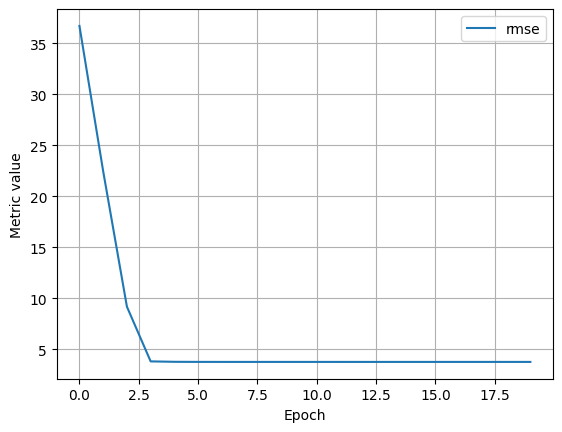

In [66]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.002,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3784.0884 - rmse: 60.5866
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3394.1663 - rmse: 58.1574
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3255.8943 - rmse: 57.0244
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3130.9333 - rmse: 55.7736
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3212.8745 - rmse: 56.3355
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3363.1375 - rmse: 57.9662
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3355.1567 - rmse: 57.8790
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3347.9775 - rmse: 57.7641
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3325.1702 - rmse: 57.5226
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3276.8660 - rmse: 57.0624
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3229.3057 - rmse: 56.7616
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

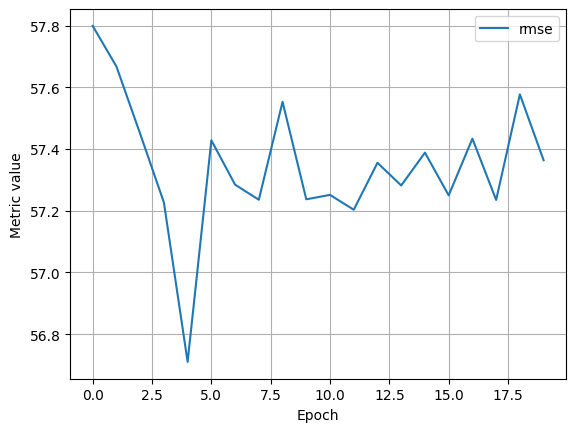

In [54]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 10.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/2
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 665.8741 - rmse: 25.7837
Epoch 2/2
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 334.0021 - rmse: 18.2556
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


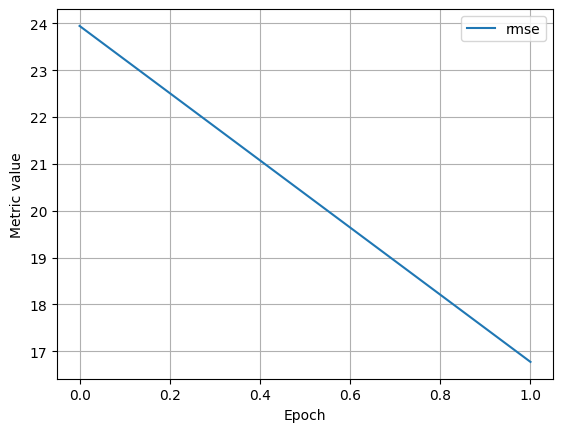

In [61]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 2,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 350.9623 - rmse: 18.7095
Epoch 2/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 140.3066 - rmse: 11.8022
Epoch 3/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35.0639 - rmse: 5.8849
Epoch 4/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.9520 - rmse: 4.2331
Epoch 5/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.4110 - rmse: 4.0478
Epoch 6/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.8567 - rmse: 4.1007
Epoch 7/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.9468 - rmse: 3.9888
Epoch 8/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.2876 - rmse: 3.7762
Epoch 9/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.1115 - rmse: 3.7520
Epoch 10/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.8089 - rmse: 3.7120
Epoch 11/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.7020 - rmse: 3.9537
Epoch 12/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.2409 - rmse: 3.63

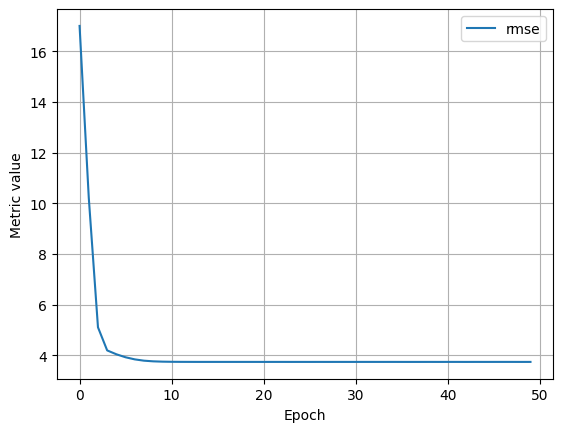

In [62]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 50,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 406.4507 - rmse: 19.7855
Epoch 2/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 15.6998 - rmse: 3.9519
Epoch 3/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 14.6892 - rmse: 3.8302
Epoch 4/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 13.4204 - rmse: 3.6571
Epoch 5/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 13.8296 - rmse: 3.7141
Epoch 6/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 13.3880 - rmse: 3.6471
Epoch 7/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 13.6075 - rmse: 3.6813
Epoch 8/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 14.4032 - rmse: 3.7893
Epoch 9/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 14.2169 - rmse: 3.7667
Epoch 10/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 13.2953 - rmse: 3.6428
Epoch 11/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 12.8011 - rmse: 3.5717
Epoch 12/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss

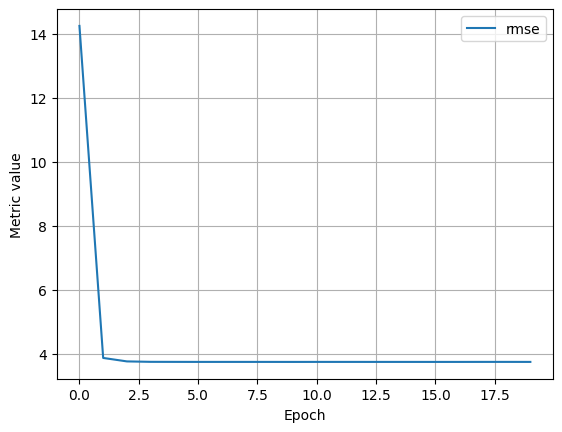

In [64]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 10,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1261.9944 - rmse: 35.5186
Epoch 2/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 958.8843 - rmse: 30.9548
Epoch 3/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 687.0319 - rmse: 26.2053
Epoch 4/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 479.7173 - rmse: 21.8881
Epoch 5/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 298.6013 - rmse: 17.2702
Epoch 6/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 164.8618 - rmse: 12.8274
Epoch 7/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 74.4288 - rmse: 8.6079
Epoch 8/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.8790 - rmse: 5.0742
Epoch 9/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.4560 - rmse: 3.6586
Epoch 10/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.2921 - rmse: 3.9013
Epoch 11/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.3967 - rmse: 3.7904
Epoch 12/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.5332 - r

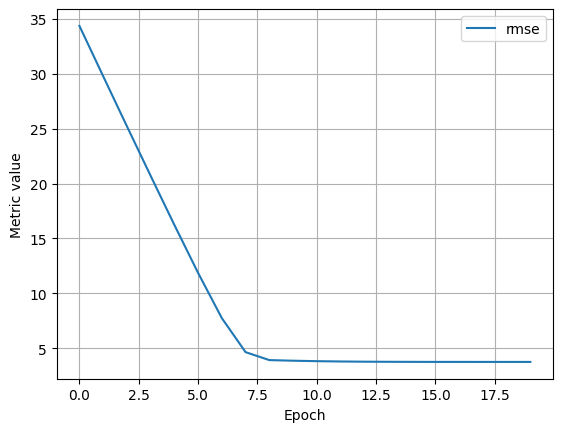

In [65]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 80,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

In [51]:
#@title Haga doble clic para ver las respuestas del modelo de entrenamiento con una característica

# How many epochs did it take to converge on the final model?
# -----------------------------------------------------------------------------
answer = """
Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.
"""
print(answer)

# How well does the model fit the sample data?
# -----------------------------------------------------------------------------
answer = '''
It appears from the model plot that the model fits the sample data fairly well.
'''
print(answer)


Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.


It appears from the model plot that the model fits the sample data fairly well.

